In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import math
import random
import time

import sys
sys.path
sys.path.insert(0, '/Users/asaadeldin/Downloads/GitHub/graspy')

from graspy.match import SeededGraphMatching as SGM
from graspy.plot import heatmap
from graspy.simulations import er_corr, sbm, sbm_corr
from graspy.utils import cartprod

In [87]:
def match_ratio(v,w):
    return 1-(np.count_nonzero(abs(v-w))/n)

In [88]:
#code for construct the matrix to recreate figure 2 from SGM
# rows are seeds, columns are rhos

n = 300
m = range(20)
rhos = .1*np.arange(11)
ratios = np.zeros((20,11))
for k in range(11):
    rho = rhos[k]
    for i in m:
        sums = 0
        for j in range(2):
            A1, A2 = sbm_corr(block_members, block_probs, rho, directed=directed, loops=loops)
            node_shuffle_input = np.random.permutation(n)
            A2_shuffle = A2[np.ix_(node_shuffle_input, node_shuffle_input)]
            node_unshuffle_input = np.array(range(n))
            node_unshuffle_input[node_shuffle_input] = np.array(range(n))

            W1 = np.sort(random.sample(list(range(n)),i))
            W1 = W1.astype(int)
            W2 = np.array(node_unshuffle_input[W1])
    
            faq = SGM(gmp=True)
            faq = faq.fit(A1,A2_shuffle,W1,W2)
            sums += match_ratio(faq.perm_inds_,node_unshuffle_input)
            
        ratios[i,k] = sums/2
        




IndexError: index 10 is out of bounds for axis 1 with size 10

In [114]:
#for just one rho value

rho = 1.0
new = np.zeros((20,1))

for i in m:
    sums = 0
    for j in range(2):
        A1, A2 = sbm_corr(block_members, block_probs, rho, directed=directed, loops=loops)
        node_shuffle_input = np.random.permutation(n)
        A2_shuffle = A2[np.ix_(node_shuffle_input, node_shuffle_input)]
        node_unshuffle_input = np.array(range(n))
        node_unshuffle_input[node_shuffle_input] = np.array(range(n))

        W1 = np.sort(random.sample(list(range(n)),i))
        W1 = W1.astype(int)
        W2 = np.array(node_unshuffle_input[W1])
    
        faq = SGM(gmp=True)
        faq = faq.fit(A1,A2_shuffle,W1,W2)
        sums += match_ratio(faq.perm_inds_,node_unshuffle_input)
            
    new[i] = sums/2



Text(0.5, 1.0, 'rho=0.9 (only one run at each seed)')

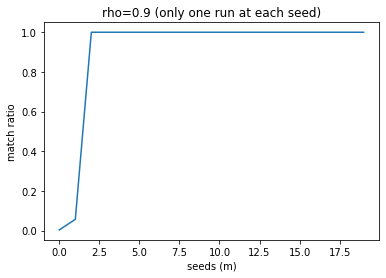

In [43]:
plt.plot(m,ratios)
plt.xlabel("seeds (m)")
plt.ylabel("match ratio")
plt.title("rho=0.9 (only one run at each seed)")

In [80]:
directed = False
loops = False
n_per_block = 100
n_blocks = 3
block_members = np.array(n_blocks * [n_per_block])
n_verts = block_members.sum()
rho = .9
block_probs = np.array([[0.7, 0.3, 0.4], [0.3, 0.7, 0.3], [0.4, 0.3, 0.7]])

A1, A2 = sbm_corr(block_members, block_probs, rho, directed=directed, loops=loops)

n = 300
m = 20

node_shuffle_input = np.random.permutation(n)
A2_shuffle = A2[np.ix_(node_shuffle_input, node_shuffle_input)]
node_unshuffle_input = np.array(range(n))
node_unshuffle_input[node_shuffle_input] = np.array(range(n))

W1 = np.sort(random.sample(list(range(n)),m))
W1 = W1.astype(int)
W2 = np.array(node_unshuffle_input[W1])



In [115]:
ratios_new = np.append(ratios,new,axis=1)

Text(0, 0.5, 'match ratio')

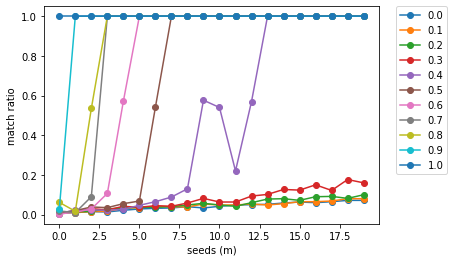

In [140]:
for i in range(11):
    plt.plot(m,ratios_new[:,i], '-o', label = str(rhos[i]))
    
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.xlabel("seeds (m)")
plt.ylabel("match ratio")


In [136]:
rhos = np.arange(11)*.1
rhos[3]=0.3
rhos[6]=0.6
rhos[7]=0.7

In [82]:
print(faq.perm_inds_)
print(node_unshuffle_input)
print(faq.perm_inds_[W1])
print(W2)
print(node_unshuffle_input[W1])
print(W2)

[ 58 150  44 133  65 146  86 198 216  99  33 104 177  17 109  31 292  36
 296 237  35  79  76 207  88 274  85 170  28  20 115  98 238  53  66 114
 221 258 172 195 180 123  89 255 135 106 293  22 187  16  32 277  51 260
  24 265  13 288  91 149  72 212 219 214  75  61  54 186  62 137 130  21
  45   0 178 113  25 164 218  78 234  73 226 165  93 181  19 157  69 244
 278  94 161 289 266 269 211 110  42 250  26  90 215 223 154 205 176 282
 230   1 287 224 148 138  30 179 232  97 160  14  41 275 139 263  92 295
 141 145 155 182 200  70 208 132 248 268 291   6 197  18 264  84 191 273
 163 294  83 120 256 143 102 194  87 257  49  40 117 252 290 111 267  43
 175 281   5 103   3 171 184 247 158 251 151 228   8 119 100 210 235  48
 188  77 126 129  63 153 279 261 199  47 298 213  39 201 245 262 101  67
  60 134 174 209  29  56 166  68 217 276 156 124  81 152 183 225 204  15
  12 280 192  74 286 168 144   9 239 159 297 202  10 220  27 128 131 271
 173 116 229 231 242 108 206 227 107 283 167 136 11

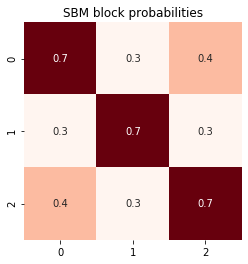

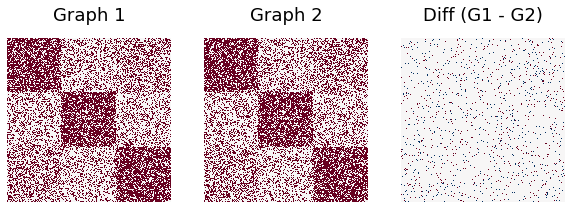

In [11]:
directed = False
loops = False
n_per_block = 100
n_blocks = 3
block_members = np.array(n_blocks * [n_per_block])
n_verts = block_members.sum()
rho = .9
block_probs = np.array([[0.7, 0.3, 0.4], [0.3, 0.7, 0.3], [0.4, 0.3, 0.7]])
fig, ax = plt.subplots(1, 1, figsize=(4, 4))
sns.heatmap(block_probs, cbar=False, annot=True, square=True, cmap="Reds", ax=ax)
ax.set_title("SBM block probabilities")

A1, A2 = sbm_corr(block_members, block_probs, rho, directed=directed, loops=loops)
fig, axs = plt.subplots(1, 3, figsize=(10, 5))
heatmap(A1, ax=axs[0], cbar=False, title="Graph 1")
heatmap(A2, ax=axs[1], cbar=False, title="Graph 2")
heatmap(A1 - A2, ax=axs[2], cbar=False, title="Diff (G1 - G2)")


In [59]:
def _get_AB(qap_prob):
    with open("qapdata/" + qap_prob + ".dat") as f:
        f = [int(elem) for elem in f.read().split()]

        # adjusting
        f = np.array(f[1:])
        n = int(math.sqrt(len(f) / 2))
        f = f.reshape(2 * n, n)
        A = f[:n, :]
        B = f[n:, :]
        return A, B
    
sgm = SGM(gmp=False)

In [78]:
A, B = _get_AB("chr12c")
n = A.shape[0]
pi = np.array([7, 5, 1, 3, 10, 4, 8, 6, 9, 11, 2, 12]) - [1] * n
W1 = np.sort(random.sample(list(range(n)), 3))
W2 = [pi[z] for z in W1]
chr12c = sgm.fit(A, B, W1, W2)
score = chr12c.score_
print(W1)
print(W2)
print(score)

[ 1  7 11]
[4, 5, 11]
12948


In [79]:
chr12c = sgm.fit(A, B, W1, W2)
score = chr12c.score_
print(W1)
print(W2)
print(score)

[ 1  7 11]
[4, 5, 11]
12948


In [39]:
 A, B = _get_AB("chr15a")
n = A.shape[0]
pi = np.array([5, 10, 8, 13, 12, 11, 14, 2, 4, 6, 7, 15, 3, 1, 9]) - [1] * n        
W1 = np.sort(random.sample(list(range(n)), 4))
W2 = [pi[z] for z in W1]
chr15a = sgm.fit(A, B, W1, W2)
score = chr15a.score_
print(W1)
print(W2)
print(score)


[ 0  5 11 14]
[4, 10, 14, 8]
15680


In [52]:
chr15a = sgm.fit(A, B, W1, W2)
score = chr15a.score_
print(W1)
print(W2)
print(score)


[ 0  5 11 14]
[4, 10, 14, 8]
15680


In [53]:
sgm = SGM(n_init=100, init_method="rand", gmp=False)

In [54]:
A, B = _get_AB("chr12c")
n = A.shape[0]
pi = np.array([7, 5, 1, 3, 10, 4, 8, 6, 9, 11, 2, 12]) - [1] * n
W1 = np.sort(random.sample(list(range(n)), 3))
W2 = [pi[z] for z in W1]
chr12c = sgm.fit(A, B, W1, W2)
score = chr12c.score_
print(W1)
print(W2)
print(score)

[ 0  6 10]
[6, 7, 1]
11156


In [58]:
W1 = [4,8,10]
W2 = [pi[z] for z in W1]
chr12c = sgm.fit(A, B, W1, W2)
score = chr12c.score_
print(W1)
print(W2)
print(score)

[4, 8, 10]
[11, 3, 6]
9896


In [57]:
 A, B = _get_AB("chr15a")
n = A.shape[0]
pi = np.array([5, 10, 8, 13, 12, 11, 14, 2, 4, 6, 7, 15, 3, 1, 9]) - [1] * n        
W1 = [0,5,11,14]
W2 = [pi[z] for z in W1]
chr15a = sgm.fit(A, B, W1, W2)
score = chr15a.score_
print(W1)
print(W2)
print(score)

[0, 5, 11, 14]
[4, 10, 14, 8]
9896


In [89]:
s = [3,0,2,1,3,2,1,0,2,1]
print(np.mean(s))
print(np.var(s))

1.5
1.05
